# Retraining polynomial regression with different random seeds

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## load and prepare data

In [44]:
data = pd.read_csv('CLEANED_sobolsampling-2048.csv')
#print(f'{data}')
data = data.drop(data.columns[0], axis=1)
#print(f'{data}')

X = data.drop('density', axis=1)
#print(f'{X}')

Y = data['density']
#print(f'{Y}')

## split data by using different random states

In [18]:
random_array = np.random.rand(30)*100
random_array = random_array.astype(int)
print(f'{random_array}')

[97 28 50 92 65 28 23  5 92 14 34 81 62 56 13 78 14 35 14  5 32 55 68  7
 55 31 89 90 48  1]


In [24]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

In [27]:
X_TRAINs = []
X_TESTs = []
Y_TRAINs = []
Y_TESTs = []
for i in random_ints:
    #print(f'{i}')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=i)
    X_TRAINs.append(X_train)
    X_TESTs.append(X_test)
    Y_TRAINs.append(Y_train)
    Y_TESTs.append(Y_test)


## create and train models

In [28]:
MODELs = []
Y_PREDICTIONs = []
RMSEs = []
R2s = []

for i in range(0, len(random_ints)):
    ## creation of the pipeline
    model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    
    ## train/fit the model
    model.fit(X_TRAINs[i], Y_TRAINs[i])
    MODELs.append(model)
    
    ## prediction using the test set
    Y_prediction = model.predict(X_TESTs[i])
    Y_PREDICTIONs.append(Y_prediction)
    
    ## evaluate with Y_test
    rmse = np.sqrt(mean_squared_error(Y_TESTs[i], Y_prediction))
    r2 = r2_score(Y_TESTs[i], Y_prediction)
    RMSEs.append(rmse)
    R2s.append(r2)
    #print(f'RMSE: {rmse}')
    #print(f'R2: {r2}')

## plot RMSEs and R2s

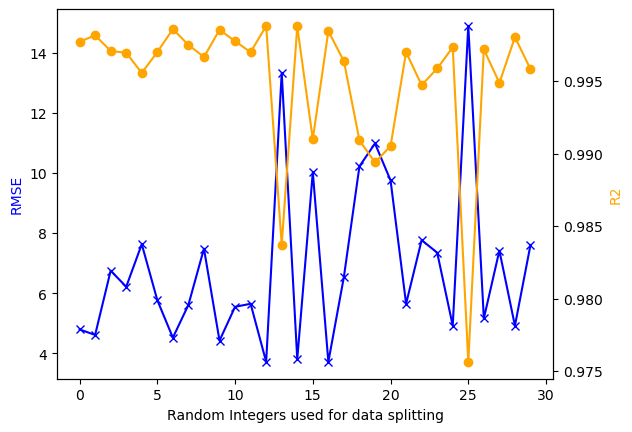

In [43]:
fig, ax1 = plt.subplots()
ax1.plot(RMSEs, '-x', color='blue', label='RMSE')
ax1.set_xlabel('Random Integers used for data splitting')
ax1.set_ylabel('RMSE', color='blue')

ax2 = ax1.twinx()
ax2.plot(R2s, '-o', color='orange', label='R2')
ax2.set_ylabel('R2', color='orange')

#plt.legend()
plt.show()
fig.savefig('Training_with_different_randomseeds_for_data_splits.png')

## means of RMSE and R2

In [40]:
print(f'avg. RMSE: {np.mean(RMSEs)}')
print(f'Std Dev: {np.std(RMSEs)}')
#print(f'Variance: {np.var(RMSEs)}')

avg. RMSE: 6.89206103168849
Std Dev: 2.7344931739407072


In [41]:
print(f'avg. R2: {np.mean(R2s)}')
print(f'Std Dev: {np.std(R2s)}')
#print(f'Variance: {np.var(R2s)}')

avg. R2: 0.9950909058708238
Std Dev: 0.00493037472497406
